<a href="https://colab.research.google.com/github/ParkSlingshot/-/blob/main/Scatter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Mount Drive

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


#2. 한글패치

In [15]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
plt.rc('font', family='NanumBarunGothic')

#3. Load & Select Data

In [3]:
file = ('/gdrive/MyDrive/data/data_2020.csv')
data = pd.read_csv(file)

In [4]:
data_6_22 = data[data['집계시'].isin(range(6,23))]
data_6_22

,집계일자,집계시,출발영업소코드,도착영업소코드,통행시간,요일
10,20200101,10,101,105,686,2
11,20200101,10,101,105,761,2
12,20200101,10,101,105,704,2
13,20200101,10,101,105,807,2
14,20200101,10,101,105,687,2
...,...,...,...,...,...,...
37348,20200331,6,101,115,6938,1
37349,20200331,17,101,135,12477,1
37351,20200331,10,101,105,885,1
37352,20200331,8,101,140,13403,1


In [5]:
data_6_22_count = data_6_22['집계시'].value_counts()
data_6_22_count

14    1766
12    1758
15    1755
13    1754
11    1744
10    1725
16    1724
17    1719
9     1703
18    1666
8     1662
19    1628
20    1611
7     1585
21    1559
22    1505
6     1440
Name: 집계시, dtype: int64

In [6]:
data_6_22_count_sorted = data_6_22_count.sort_index()
data_6_22_count_sorted

6     1440
7     1585
8     1662
9     1703
10    1725
11    1744
12    1758
13    1754
14    1766
15    1755
16    1724
17    1719
18    1666
19    1628
20    1611
21    1559
22    1505
Name: 집계시, dtype: int64

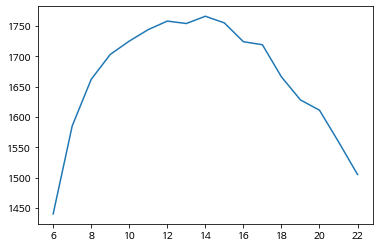

In [7]:
plt.plot(data_6_22_count_sorted.index , data_6_22_count_sorted.values)

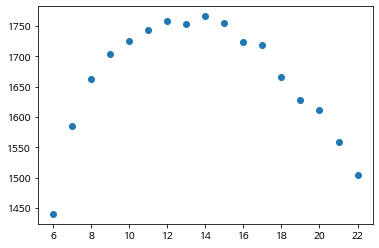

In [8]:
#scatter 차트 plotting
plt.scatter(data_6_22_count_sorted.index , data_6_22_count_sorted.values)

In [9]:
data_6_22_time = data_6_22['통행시간']
data_6_22_time

10         686
11         761
12         704
13         807
14         687
         ...  
37348     6938
37349    12477
37351      885
37352    13403
37354     3598
Name: 통행시간, Length: 28304, dtype: int64

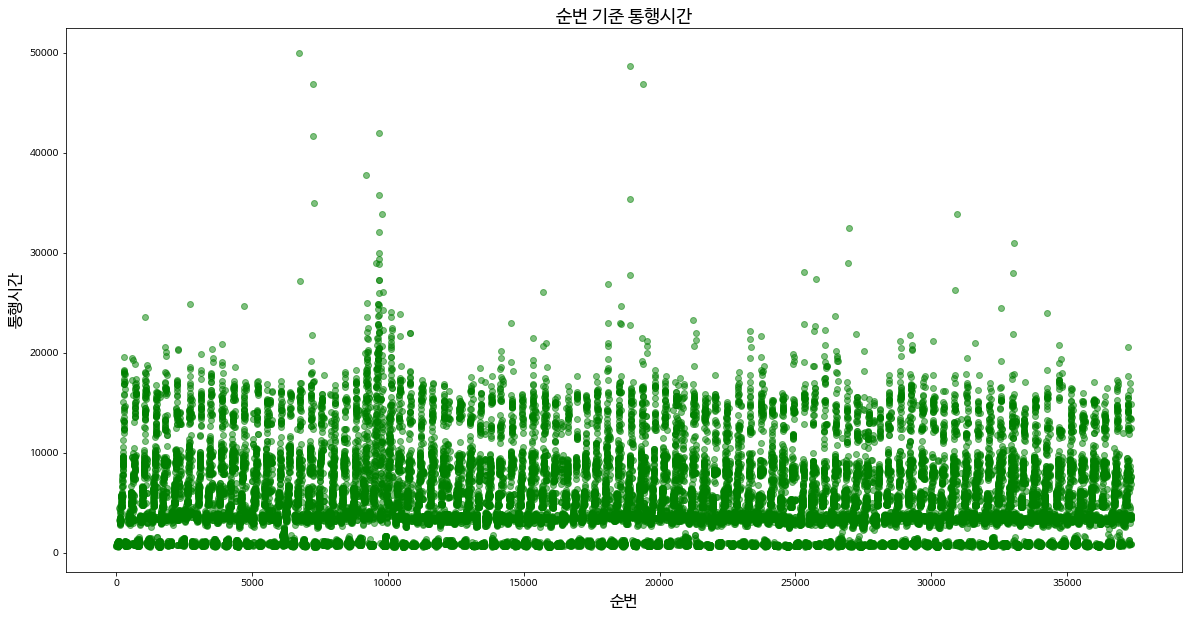

In [10]:
# Configure figure size
plt.figure(figsize=(20,10))
plt.scatter(data_6_22_time.index, data_6_22_time.values, c="g", alpha = 0.5)
plt.title("순번 기준 통행시간",fontsize = 18)
plt.xlabel('순번',fontdict={'size':16})
plt.ylabel('통행시간',fontdict={'size':16})
plt.show()

#4. 집계일자 

In [11]:
data_days = data.groupby(by=['집계일자']).mean()

In [12]:
data_days

,집계시,출발영업소코드,도착영업소코드,통행시간,요일
집계일자,,,,,
20200101,12.070707,101.0,114.785354,5241.186869,2.0
20200102,12.179245,101.0,113.985849,4776.393868,3.0
20200103,11.780702,101.0,115.230263,5351.916667,4.0
20200104,11.694030,101.0,114.838308,5206.171642,5.0
20200105,12.508333,101.0,115.263889,5266.744444,6.0
...,...,...,...,...,...
20200327,12.363409,101.0,113.771930,4584.248120,4.0
20200328,11.332506,101.0,114.540943,4858.759305,5.0
20200329,12.288312,101.0,114.779221,4668.493506,6.0


In [14]:
#data_days에서 시간만 추출
data_days_time = data_days['통행시간']
data_days_time

집계일자
20200101    5241.186869
20200102    4776.393868
20200103    5351.916667
20200104    5206.171642
20200105    5266.744444
               ...     
20200327    4584.248120
20200328    4858.759305
20200329    4668.493506
20200330    4644.770833
20200331    4409.579710
Name: 통행시간, Length: 91, dtype: float64

In [15]:
x = data_days_time.index
x= [str(i) for i in x]
x

['20200101',
 '20200102',
 '20200103',
 '20200104',
 '20200105',
 '20200106',
 '20200107',
 '20200108',
 '20200109',
 '20200110',
 '20200111',
 '20200112',
 '20200113',
 '20200114',
 '20200115',
 '20200116',
 '20200117',
 '20200118',
 '20200119',
 '20200120',
 '20200121',
 '20200122',
 '20200123',
 '20200124',
 '20200125',
 '20200126',
 '20200127',
 '20200128',
 '20200129',
 '20200130',
 '20200131',
 '20200201',
 '20200202',
 '20200203',
 '20200204',
 '20200205',
 '20200206',
 '20200207',
 '20200208',
 '20200209',
 '20200210',
 '20200211',
 '20200212',
 '20200213',
 '20200214',
 '20200215',
 '20200216',
 '20200217',
 '20200218',
 '20200219',
 '20200220',
 '20200221',
 '20200222',
 '20200223',
 '20200224',
 '20200225',
 '20200226',
 '20200227',
 '20200228',
 '20200229',
 '20200301',
 '20200302',
 '20200303',
 '20200304',
 '20200305',
 '20200306',
 '20200307',
 '20200308',
 '20200309',
 '20200310',
 '20200311',
 '20200312',
 '20200313',
 '20200314',
 '20200315',
 '20200316',
 '20200317',

In [22]:
y = data_days_time.values

집계시          13.105422
출발영업소코드     101.000000
도착영업소코드     117.461340
통행시간       9536.634021
요일            6.000000
dtype: float64

Text(0, 0.5, '집계일')

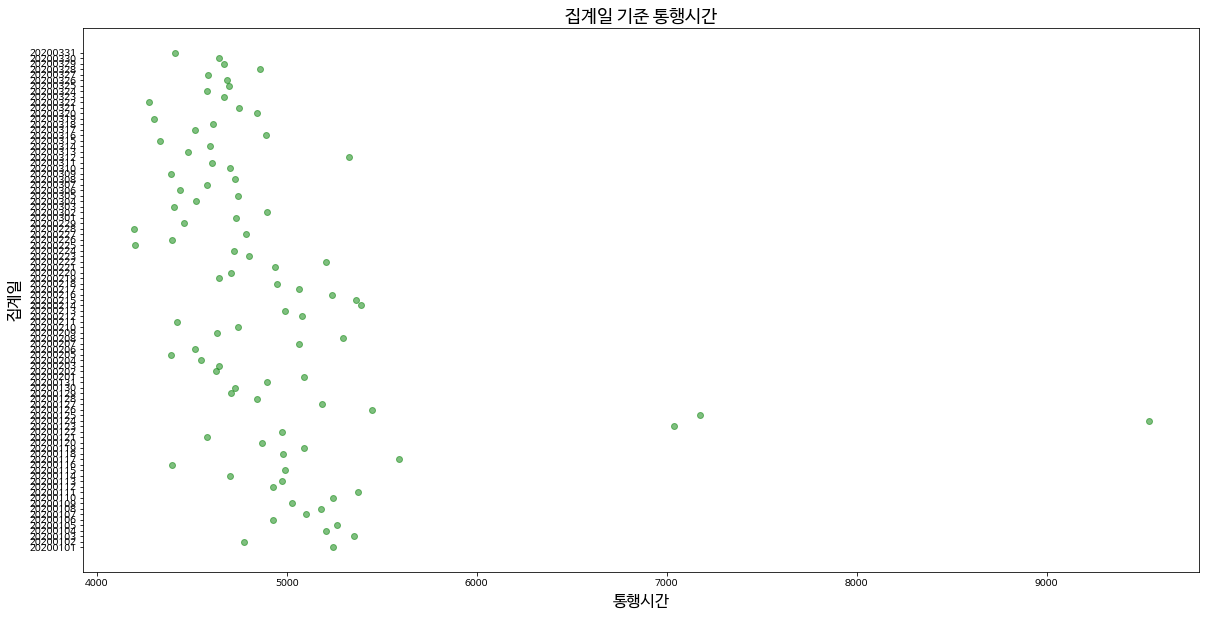

In [24]:
plt.figure(figsize = (20,10))
plt.scatter(y,x,c="g",alpha= 0.5)
plt.title("집계일 기준 통행시간", fontsize = 18)
plt.xlabel( '통행시간',fontdict = {'size': 16})
plt.ylabel('집계일',fontdict = {'size': 16})

In [29]:
#101서울 105기흥 110목천 115대전 120황간 125남구미 130동김천 135경주 140부산
#데이터 분화

data_110_days = data[data['도착영업소코드']==110].groupby(by=['집계일자']).mean()
data_125_days = data[data['도착영업소코드']==125].groupby(by=['집계일자']).mean()
data_140_days = data[data['도착영업소코드']==140].groupby(by=['집계일자']).mean()
data_110_days

,집계시,출발영업소코드,도착영업소코드,통행시간,요일
집계일자,,,,,
20200101,11.954545,101.0,110.0,3435.045455,2.0
20200102,11.082645,101.0,110.0,3424.710744,3.0
20200103,11.155963,101.0,110.0,3376.376147,4.0
20200104,11.254902,101.0,110.0,3436.235294,5.0
20200105,12.512821,101.0,110.0,3515.410256,6.0
...,...,...,...,...,...
20200327,11.603774,101.0,110.0,3695.405660,4.0
20200328,10.032609,101.0,110.0,3394.380435,5.0
20200329,11.780220,101.0,110.0,3225.032967,6.0


In [30]:
data_110_days_time = data_110_days['통행시간']
data_125_days_time = data_125_days['통행시간']
data_140_days_time = data_140_days['통행시간']
data_110_days_time

집계일자
20200101    3435.045455
20200102    3424.710744
20200103    3376.376147
20200104    3436.235294
20200105    3515.410256
               ...     
20200327    3695.405660
20200328    3394.380435
20200329    3225.032967
20200330    3418.598361
20200331    3454.696721
Name: 통행시간, Length: 91, dtype: float64

Text(0, 0.5, '집계일')

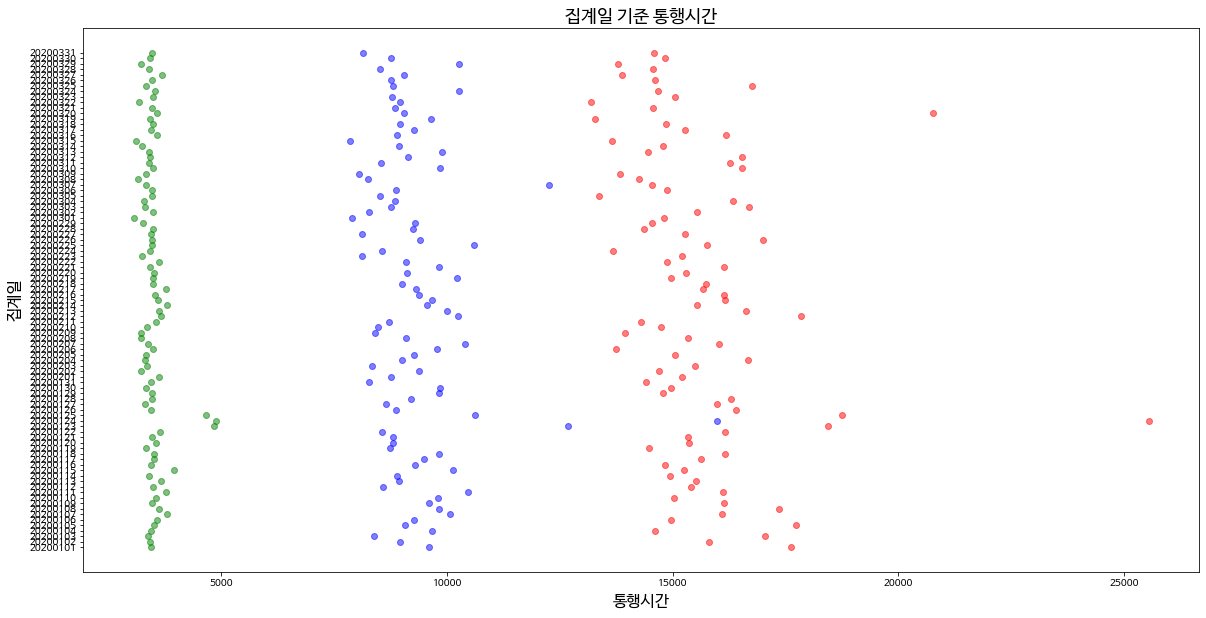

In [31]:
#겹쳐서 SCATERRING
plt.figure(figsize = (20,10))

plt.scatter(data_110_days_time.values,x,c="g",alpha= 0.5)
plt.scatter(data_125_days_time.values,x,c="b",alpha= 0.5)
plt.scatter(data_140_days_time.values,x,c="r",alpha= 0.5)

plt.title("집계일 기준 통행시간", fontsize = 18)

plt.xlabel( '통행시간',fontdict = {'size': 16})

plt.ylabel('집계일',fontdict = {'size': 16})